In [1]:
#----------------------------
#Imports
#----------------------------

import pandas as pd
import numpy as np

import random
import matplotlib.pyplot as plt
import seaborn as sns

import warnings            
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.preprocessing import PolynomialFeatures

STEP 1 : Loading the dataset

Question A:

Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?

In [2]:
#Dataset is taken from Kaggle - https://www.kaggle.com
df = pd.read_csv("Admission_Predict.csv")
df.head()
df.shape

(400, 9)

STEP 2 : Exploring the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [4]:
#identifying all catergotical fields
df.select_dtypes(include=['object']).columns.tolist()

[]

In [5]:
df.select_dtypes(exclude=['object']).columns.tolist()

['Serial No.',
 'GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

A) Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?

Observations:

1. The Admission Predict dataset contains details of applicants such as GRE, TOEFL scores, CGPA, SOP and LOR ranking, whether they done research or not etc with the label "Chance of Admit".
2. Dataset dimensions: 400 records and 9 columns
3. All the data is of numerical values, no categorical values present
4. No null values observed.
5. The features "GRE Score", "TOEFL Score", "CGPA" and the label "Chance of Admit" are continuous valued.

Question B:

Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?

In [6]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
#dropping the Serial No. feature as it has it doesn't impact label
df=df.drop("Serial No.",axis=1)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


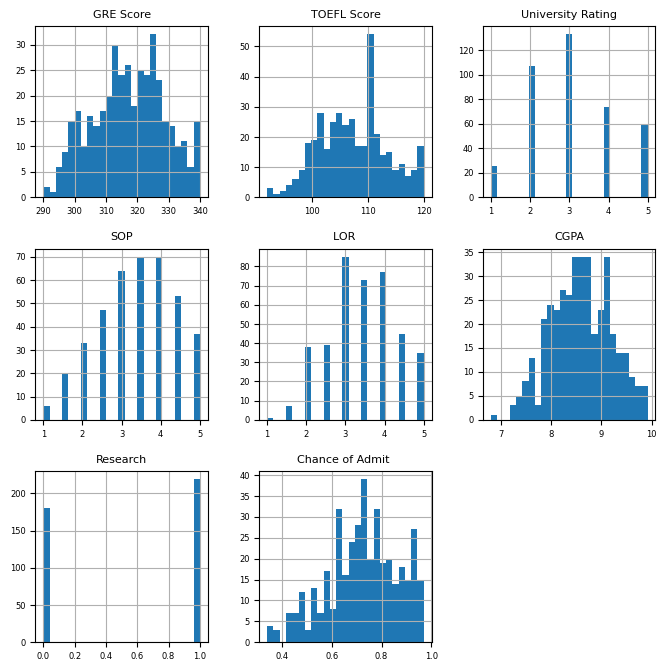

In [8]:
#Plotting Histograms
plt.rc('xtick', labelsize = 6)
plt.rc('ytick', labelsize = 6)
plt.rc('axes', labelsize=14, titlesize=8)

df.hist(bins = 25,figsize=(8,8))
plt.show()

B) Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?

Observations:

1. Based on the Histograms, the data distribution for some features "GRE Score", "SOP", "LOR" seems to take Gaussian distribution.
2. Histogram is not plotted for - "Serial No." column as it doesnot have any effect over the dependent variabe - "Chance of Admit"3. 
Assome of  the distributions arenot gaussiand, we can stratify the features to generate proper train-test splits
4. No categorical data or null values found, so, no special treatment needed for such.
5. The feature "Research" takes only 2 values, 0 and 1.
6. The features "SOP", "LOR" and "University Rating" takes values between the numbers 1 and 5..


Observations :


STEP-3 : Analysing Correlations

Question C:

Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.

Correlation calculations using :

1. corr() function - no need for null value handling.
2. 2.Seaborn Heatmap (uses pearson correlation coefficient) - no need for null value handling.
3. pearsonr() function from scipy.stats - requires null value handling.

In [9]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


<Axes: >

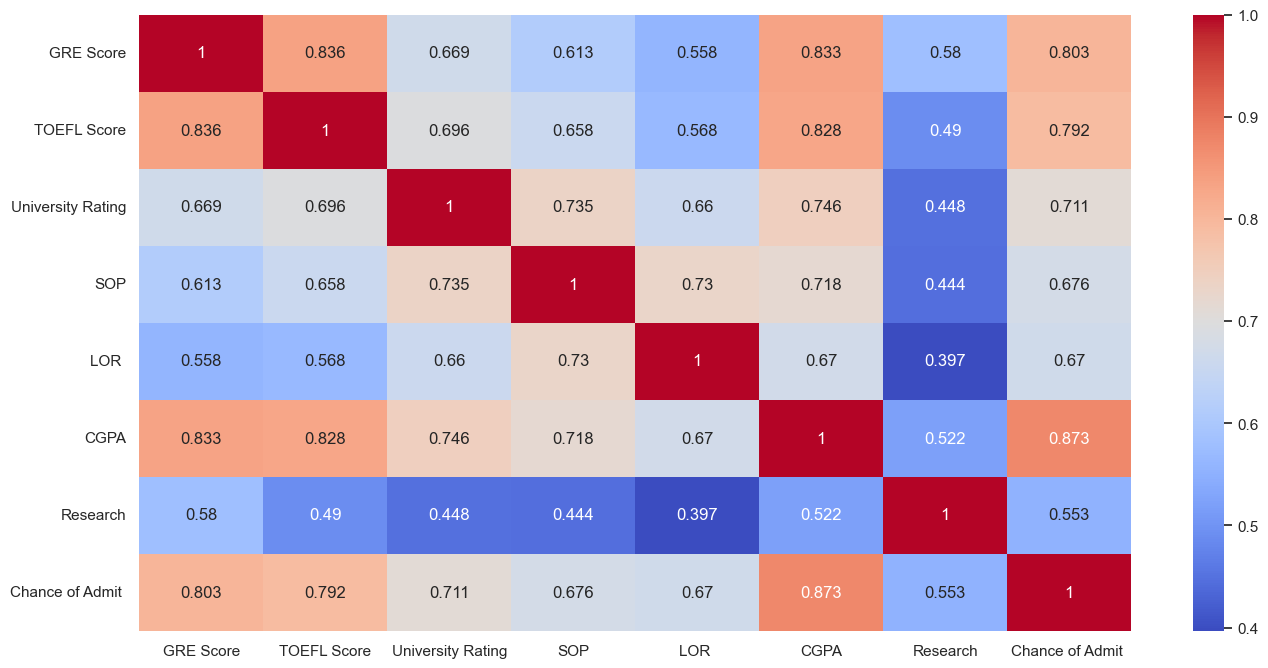

In [10]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df.corr(), annot = True, fmt='.3g',cmap= 'coolwarm')

In [11]:
#----------------------------
#Null Values Handling(on original data)
#----------------------------

#Dropping null records if any.
#no records will be dropped as there are no null data records
print(df.shape)
df = df.dropna(how='all').dropna(how='all', axis=1)
print(df.shape)
df.info()

(400, 8)
(400, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [12]:
pcc,p_value = pearsonr(df['GRE Score'],df['TOEFL Score'])
print('PCC for GRE Score and TOEFL Score:',pcc)
print('Statistical significance:',p_value)

PCC for GRE Score and TOEFL Score: 0.8359768030143961
Statistical significance: 9.011246680985368e-106


In [13]:
pcc,p_value = pearsonr(df['Chance of Admit '],df['CGPA'])
print('PCC for Chance of Admit and CGPA:',pcc)
print('Statistical significance:',p_value)

PCC for Chance of Admit and CGPA: 0.8732890993553003
Statistical significance: 2.33651400049791e-126


In [14]:
pcc,p_value = pearsonr(df['Chance of Admit '],df['GRE Score'])
print('PCC:',pcc)
print('Statistical significance:',p_value)

PCC: 0.8026104595903502
Statistical significance: 2.4581124141789995e-91


In [15]:
pcc,p_value = pearsonr(df['Chance of Admit '],df['TOEFL Score'])
print('PCC:',pcc)
print('Statistical significance:',p_value)

PCC: 0.7915939869351045
Statistical significance: 3.634102175997035e-87


In [16]:
pcc,p_value = pearsonr(df['Chance of Admit '],df['University Rating'])
print('PCC:',pcc)
print('Statistical significance:',p_value)

PCC: 0.7112502503917226
Statistical significance: 6.635019480887042e-63


In [17]:
pcc,p_value = pearsonr(df['Chance of Admit '],df['SOP'])
print('PCC:',pcc)
print('Statistical significance:',p_value)

PCC: 0.6757318583886718
Statistical significance: 1.1410946671023922e-54


In [18]:
pcc,p_value = pearsonr(df['Chance of Admit '],df['LOR '])
print('PCC:',pcc)
print('Statistical significance:',p_value)

PCC: 0.6698887920106934
Statistical significance: 2.0073145197528338e-53


In [19]:
pcc,p_value = pearsonr(df['Chance of Admit '],df['Research'])
print('PCC:',pcc)
print('Statistical significance:',p_value)

PCC: 0.5532021370190401
Statistical significance: 1.9181733806923908e-33


In [20]:
pcc,p_value = pearsonr(df['GRE Score'],df['CGPA'])
print('PCC:',pcc)
print('Statistical significance:',p_value)

PCC: 0.8330604529792947
Statistical significance: 2.1980596629513706e-104


In [21]:
pcc,p_value = pearsonr(df['TOEFL Score'],df['CGPA'])
print('PCC:',pcc)
print('Statistical significance:',p_value)

PCC: 0.8284174196598757
Statistical significance: 3.134310433846006e-102


Pcc values calculated manually are same as the values obtained from Heatmap as seaborn.heatmap also used pearson correlation coefficient to calculate correlations.

Correlation among Features:

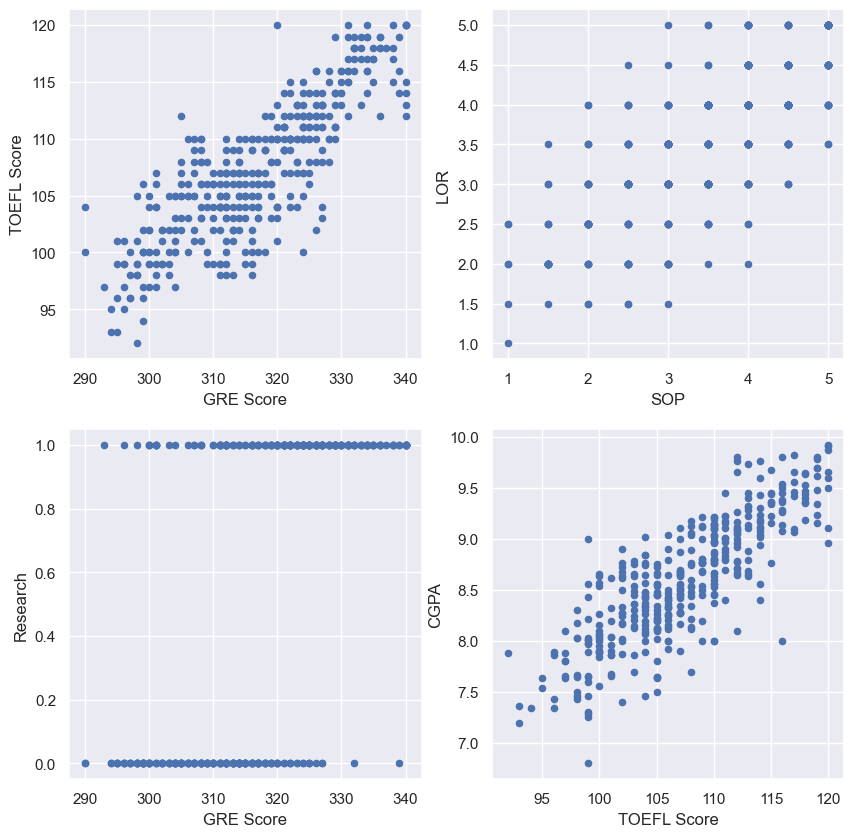

In [22]:
#Correlation among Features.
#Scatter plots for some features to observe the trend.
fig,ax=plt.subplots(2,2)

#High +ve correlation : 0.836
df.plot(kind='scatter',x='GRE Score',y='TOEFL Score',ax=ax[0][0],figsize=(10,10))

#Good +ve correlation : 0.73
df.plot(kind='scatter',x='SOP',y='LOR ',ax=ax[0][1])

#low correlation : 0.58
df.plot(kind='scatter',x='GRE Score',y='Research',ax=ax[1][0])

#High +ve correlation : 0.828
df.plot(kind='scatter',x='TOEFL Score',y='CGPA',ax=ax[1][1])
plt.show()

Correlation of Label over some Features:

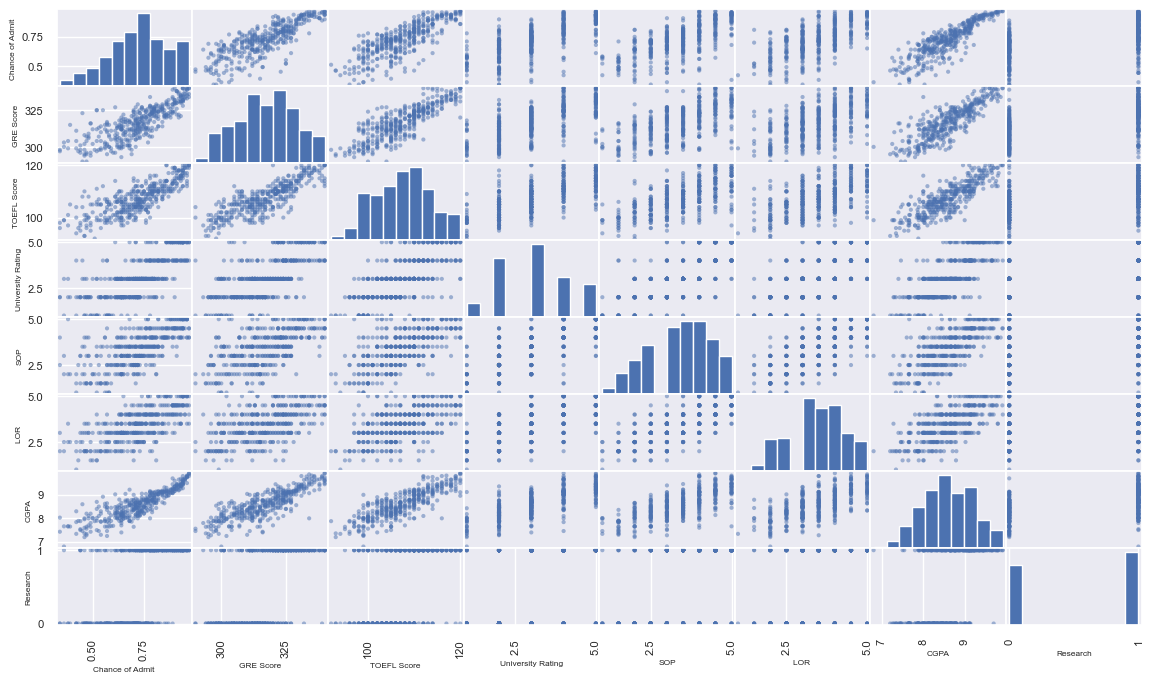

In [23]:
#Scatter matrix for features with high correlation over Label are observed.
attributes = ["Chance of Admit ", "GRE Score", "TOEFL Score",
 "University Rating","SOP","LOR ","CGPA","Research"]
plt.rc('axes', labelsize=6, titlesize=8)
scatter_matrix(df[attributes], figsize=(14, 8))
plt.show()

plt.rc('axes', labelsize=12, titlesize=8)

C)Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.

Observations:

1. Pcc values calculated manually are same as the values obtained from Heatmap as seaborn.heatmap also used pearson correlation coefficient to calculate correlations.
2. Correlation among Features - "GRE Score", "TOEFL Score" and "CGPA" have high positive correlation so one of the column can be dropped.
3. For the label "Chance of Admit" - the features "GRE Score", and "CGPA" gave good correlation values and the feature "Research" has less significant correlation with the label compared to all others.

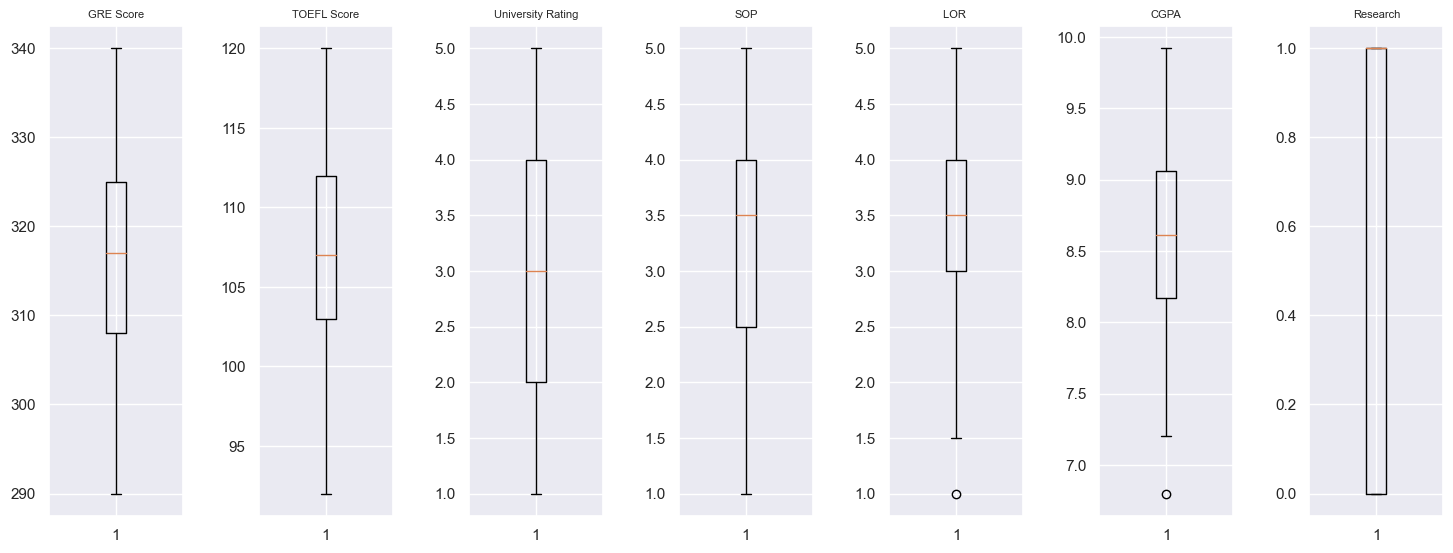

In [24]:
#----------------------------
#Outliers Handling(on original data)
#----------------------------

#Checking for outliers using boxplots
column_list = ["GRE Score","TOEFL Score","University Rating","SOP","LOR ","CGPA","Research"]
def boxPlots(column_list):
    fig, axes = plt.subplots(1, len(column_list), figsize=(15, 6))
    for i, column in enumerate(column_list):
        axes[i].boxplot(df[column])
        axes[i].set_title(column)
    plt.tight_layout(pad = 2.0)
    plt.show()

boxPlots(column_list)

No significant number of outliers found, so no need of outlier reduction 

STEP - 4 : Split Train Test data

Question D:

Select 20% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset.

<Axes: >

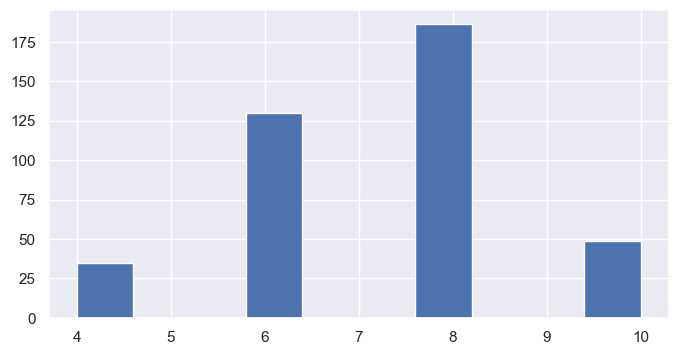

In [25]:
df['Strat']=pd.cut(df['Chance of Admit '],bins=[0.1, 0.3, 0.5, 0.7, 0.9,np.inf],labels=[2,4,6,8,10])
df['Strat'].hist(figsize = (8,4))

The above graph shows that the Target data is not uniform.

In [26]:
#Making changes on original data - dropping very less impactful columns and one of the highly correlated columns.
df = df.drop(['Research','TOEFL Score'],axis = 1)

Proceeding with the strategy :

1. Make train-test split with 80-20%.
2. Then split the train-test to feature and label i.e., x_train,y_train and x_test,y_test.

In [27]:
strat_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in strat_splitter.split(df, df['Strat']):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]

#Without stratified split:
#train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [28]:
print("Total records - ",len(df))
print("Train set - ",len(train_set))
print("Test set - ",len(test_set))

Total records -  400
Train set -  320
Test set -  80


Now, to check how similar or dissimilar the train-test sets are from the original dataset.

Text(0.5, 1.0, 'Test Set')

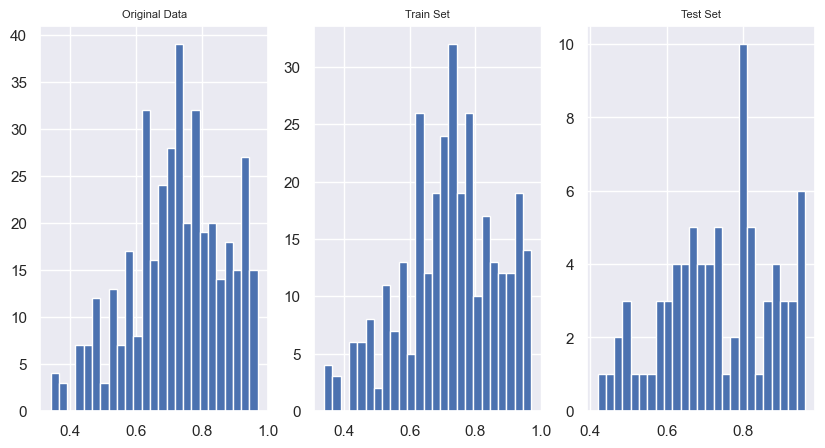

In [29]:
#1. Distribution check for Target(Label) 
fig,ax=plt.subplots(1,3)
df['Chance of Admit '].hist(bins = 25,figsize=(10,5),ax=ax[0])
train_set['Chance of Admit '].hist(bins = 25,figsize=(10,5),ax=ax[1])
test_set['Chance of Admit '].hist(bins = 25,figsize=(10,5),ax=ax[2])

ax[0].set_title('Original Data')
ax[1].set_title('Train Set')
ax[2].set_title('Test Set')

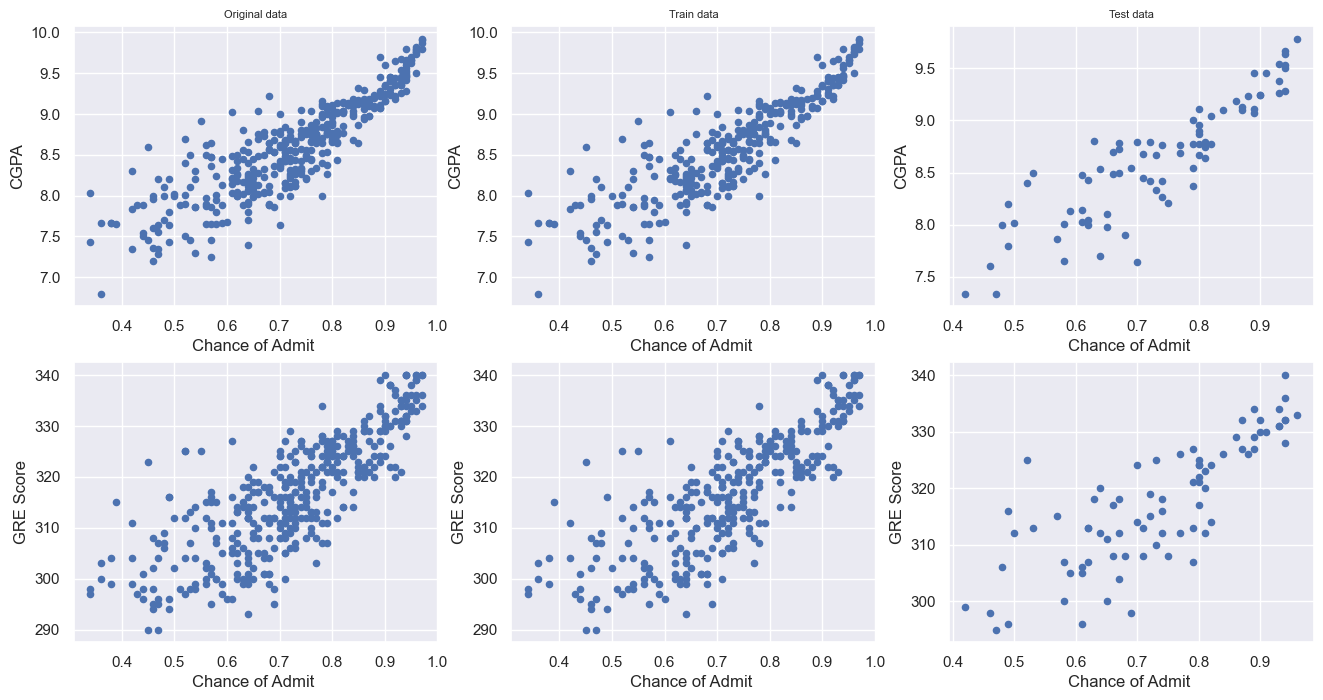

In [30]:
#2.Distribution check for Features over Target.
fig,ax=plt.subplots(2,3)
df.plot(kind='scatter',x='Chance of Admit ',y='CGPA',title = 'Original data',ax=ax[0][0],figsize=(16,8))
train_set.plot(kind='scatter',x='Chance of Admit ',y='CGPA',title = 'Train data',ax=ax[0][1])
test_set.plot(kind='scatter',x='Chance of Admit ',y='CGPA',title = 'Test data',ax=ax[0][2])

df.plot(kind='scatter',x='Chance of Admit ',y='GRE Score',ax=ax[1][0])
train_set.plot(kind='scatter',x='Chance of Admit ',y='GRE Score',ax=ax[1][1])
test_set.plot(kind='scatter',x='Chance of Admit ',y='GRE Score',ax=ax[1][2])

plt.show()

In [31]:
#Checking the Summary statistics as well
df.describe()

,GRE Score,University Rating,SOP,LOR,CGPA,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,3.087500,3.400000,3.452500,8.598925,0.724350
std,11.473646,1.143728,1.006869,0.898478,0.596317,0.142609
min,290.000000,1.000000,1.000000,1.000000,6.800000,0.340000
25%,308.000000,2.000000,2.500000,3.000000,8.170000,0.640000
50%,317.000000,3.000000,3.500000,3.500000,8.610000,0.730000
75%,325.000000,4.000000,4.000000,4.000000,9.062500,0.830000
max,340.000000,5.000000,5.000000,5.000000,9.920000,0.970000


In [32]:
train_set.describe()

,GRE Score,University Rating,SOP,LOR,CGPA,Chance of Admit
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,316.678125,3.071875,3.385937,3.459375,8.591094,0.722031
std,11.615556,1.149277,1.004046,0.890514,0.603719,0.143680
min,290.000000,1.000000,1.000000,1.500000,6.800000,0.340000
25%,308.000000,2.000000,2.500000,3.000000,8.167500,0.640000
50%,317.000000,3.000000,3.500000,3.500000,8.565000,0.730000
75%,325.000000,4.000000,4.000000,4.000000,9.060000,0.830000
max,340.000000,5.000000,5.000000,5.000000,9.920000,0.970000


In [33]:
test_set.describe()

,GRE Score,University Rating,SOP,LOR,CGPA,Chance of Admit
count,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000
mean,317.325000,3.150000,3.456250,3.425000,8.63025,0.733625
std,10.942629,1.126212,1.022512,0.934907,0.56832,0.138740
min,295.000000,1.000000,1.000000,1.000000,7.34000,0.420000
25%,309.500000,2.000000,2.875000,3.000000,8.20750,0.637500
50%,317.000000,3.000000,3.500000,3.500000,8.68500,0.740000
75%,326.000000,4.000000,4.000000,4.000000,9.07750,0.825000
max,340.000000,5.000000,5.000000,5.000000,9.78000,0.960000


D) Select 20% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset.

Observations:

1. Train-test split was done using StratifiedShuffleSplit from modelselection(80% training, 20% testing)
2. Also used a random seed to maintain reproducability.
3. The train-test split does represent the entire dataset as we can see that the distributions are quite similar and summary statistics like mean, standard deviation, 50%(median) are quite similar.

STEP - 5 : Model Building and Evaluations

Question E:

Train a Linear Regression model using the training data with four-fold cross-validation using appropriate evaluation metric. Do this with a closed-form solution (using the Normal Equation or SVD) and with SGD. Perform Ridge, Lasso and Elastic Net regularization – try a few values of penalty term and describe its impact. Explore the impact of other hyperparameters, like batch size and learning rate (no need for grid search). Describe your findings. For SGD, display the training and validation loss as a function of training iteration.

Initial Steps :

1. Splitting train-test to features and target respectively.
2. Normalization application using MinMaxScaler as we have seen few non gaussian distributions - which will be converted to Gaussian distribution for better model training.

In [34]:
y_train = train_set.pop('Chance of Admit ')
x_train = train_set

y_test = test_set.pop('Chance of Admit ')
x_test = test_set

In [35]:
#Normalization
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
y_train = np.array(y_train).reshape(-1, 1)
y_train = scaler.fit_transform(y_train)

x_test = scaler.fit_transform(x_test)
y_test = np.array(y_test).reshape(-1,1)
y_test = scaler.fit_transform(y_test)

x_train

array([[0.74      , 0.5       , 0.625     , 0.42857143, 0.59615385,
        0.66666667],
       [0.64      , 0.75      , 0.75      , 1.        , 0.74679487,
        0.66666667],
       [0.44      , 0.25      , 0.375     , 0.57142857, 0.3974359 ,
        0.33333333],
       ...,
       [1.        , 1.        , 0.75      , 0.71428571, 0.8974359 ,
        0.66666667],
       [0.88      , 1.        , 0.875     , 0.85714286, 0.85897436,
        1.        ],
       [0.96      , 0.75      , 0.625     , 0.85714286, 0.8525641 ,
        1.        ]])

Model 1 : Multiple Linear Regression Model

In [36]:
evaluation_results = {}

In [37]:
def error_and_accuracy_over_test(model):
    y_pred = model.predict(x_test)
    error = np.sqrt(mean_squared_error(y_test,y_pred))
    accuracy = r2_score(y_test,y_pred)
    print("Error(RMSE) : ",round(error,4))
    print("Accuracy(R2) : ",round(accuracy,4))
    evaluation_results[model] = [round(error,4),round(accuracy,4)]

In [38]:
model1 = LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [39]:
error_and_accuracy_over_test(model1)

Error(RMSE) :  0.0761
Accuracy(R2) :  0.9112


Model 2 : Linear Regression with 4-Fold Cross Validation with SVD

In [40]:
folds = 4
kFolds = KFold(n_splits=folds, shuffle=True, random_state=42)

In [41]:
def cross_val(model,x_train,y_train):
    scores = []
    for train_index, test_index in kFolds.split(x_train):
        train_X, x_val = x_train[train_index], x_train[test_index]
        train_y, y_val = y_train[train_index], y_train[test_index]
        model.fit(train_X,train_y)
        y_pred = model.predict(x_val)
        scores.append(np.sqrt(mean_squared_error(y_val, y_pred)))
    print("Cross Validation - Evaluation using RMSE : ",scores)
    print(f"Mean:{np.array(scores).mean()} | Std:{np.array(scores).std()}")

In [42]:
#1. Closed form solution or SVD 
model2 = LinearRegression()
cross_val(model2,x_train,y_train)
#or using cross_val_scores function
scores2 = -cross_val_score(model2, x_train, np.ravel(y_train), scoring='neg_root_mean_squared_error', cv=kFolds)
print("Evaluation using RMSE (m2): ",scores2)

Cross Validation - Evaluation using RMSE :  [0.06985182601824962, 0.07259286763110424, 0.07394001632895988, 0.06718313672680558]
Mean:0.07089196167627983 | Std:0.0025990855567790717
Evaluation using RMSE (m2):  [0.06985183 0.07259287 0.07394002 0.06718314]


In [43]:
error_and_accuracy_over_test(model2)

Error(RMSE) :  0.0763
Accuracy(R2) :  0.9107


Model 3 : Linear Regression with 4-Fold Cross Validation with SGD

In [44]:
#2. SGD
iterations = 1000
model3 = SGDRegressor(alpha=0.001, l1_ratio=0.35,random_state = 42)

In [45]:
cross_val(model3,x_train,np.ravel(y_train))
#or using cross_val_scores
scores3 = -cross_val_score(model3, x_train, np.ravel(y_train), scoring='neg_root_mean_squared_error', cv=kFolds)
print("Evaluation using RMSE (m3): ",scores3)
print("Mean value : ",np.mean(scores3))

Cross Validation - Evaluation using RMSE :  [0.10793165708290836, 0.09461656224121567, 0.11183718992169182, 0.09718808835790818]
Mean:0.10289337440093102 | Std:0.007183871463438736
Evaluation using RMSE (m3):  [0.10793166 0.09461656 0.11183719 0.09718809]
Mean value :  0.10289337440093102


In [46]:
error_and_accuracy_over_test(model3)

Error(RMSE) :  0.1168
Accuracy(R2) :  0.7907


In [47]:
#----------------------------
#Training and Validation Loss curve
#----------------------------

def plot_learning_curves(model, X, y, epochs=1000):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for epoch in range(1, epochs + 1):
        model.partial_fit(X_train, np.ravel(y_train))
        y_train_predict = model.predict(X_train)
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train, y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.figure(figsize=(6, 4))
    plt.plot(np.sqrt(train_errors), "b-", linewidth=2, label="Training Loss")
    plt.plot(np.sqrt(val_errors), "r-", linewidth=2, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("RMSE")
    plt.legend()
    plt.show()

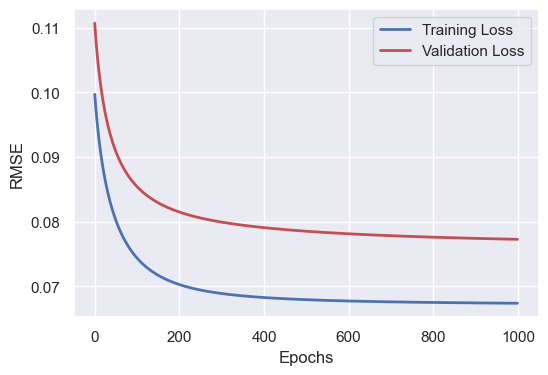

In [48]:
plot_learning_curves(model3,x_train,y_train)

Model 4 : Linear Regression with Regularization using Lasso

In [49]:
model4 = Lasso(alpha=1.0)
cross_val(model4,x_train,y_train)
scores4 = -cross_val_score(model4, x_train, np.ravel(y_train), scoring='neg_root_mean_squared_error', cv=kFolds)

Cross Validation - Evaluation using RMSE :  [0.23958178829273122, 0.20409569624319301, 0.2151577823718974, 0.25058168380412704]
Mean:0.22735423767798718 | Std:0.018565697665899467


In [50]:
error_and_accuracy_over_test(model4)

Error(RMSE) :  0.256
Accuracy(R2) :  -0.0055


Model 5 : Linear Regression with Regularization using Ridge

In [51]:
model5 = Ridge(alpha=1.0)
cross_val(model5,x_train,y_train)
scores5 = -cross_val_score(model5, x_train, np.ravel(y_train), scoring='neg_root_mean_squared_error', cv=kFolds)

Cross Validation - Evaluation using RMSE :  [0.07107103116133641, 0.0738544827172395, 0.07536477404016725, 0.06622697962967107]
Mean:0.07162931688710356 | Std:0.0034785749204457937


In [52]:
error_and_accuracy_over_test(model5)

Error(RMSE) :  0.078
Accuracy(R2) :  0.9066


Model 6 : Linear Regression with Regularization using Elastic Net

In [53]:
model6 = ElasticNet(alpha=1.0, l1_ratio=0.5)
cross_val(model6,x_train,y_train)
scores6 = -cross_val_score(model6, x_train, np.ravel(y_train), scoring='neg_root_mean_squared_error', cv=kFolds)

Cross Validation - Evaluation using RMSE :  [0.23958178829273122, 0.20409569624319301, 0.2151577823718974, 0.25058168380412704]
Mean:0.22735423767798718 | Std:0.018565697665899467


In [54]:
error_and_accuracy_over_test(model6)

Error(RMSE) :  0.256
Accuracy(R2) :  -0.0055


In [55]:
pd.DataFrame(evaluation_results.items(), columns=['Model', 'Error - Accuracy'])

,Model,Error - Accuracy
0,LinearRegression(),"[0.0761, 0.9112]"
1,LinearRegression(),"[0.0763, 0.9107]"
2,"SGDRegressor(alpha=0.001, l1_ratio=0.35, rando...","[0.1168, 0.7907]"
3,Lasso(),"[0.256, -0.0055]"
4,Ridge(),"[0.078, 0.9066]"
5,ElasticNet(),"[0.256, -0.0055]"


Observations :

1. RMSE values are pretty much low for all the models but the lowest is provided by Multiple Linear Regression, 4-Fold Cross validation using SVD or closed form solution, Ridge Regression and 4-Fold Cross validation using SGD.

2. We have also plotted the Learning curve - Training and validation loss curve over number of iterations, for parameters like alpha, learning_rate, penalty, l1_ratio etc, the graph was plotted above.

    1. As the training iterations increase, the generalization error is increased but it's not that big of an error.

    2. The plot also indicates that we eiher have limited data to work with or the model has reached a convergence state(a constant line for training and validation curve as the iterations increase over time) which we can understand more by tuning the hyperparameters.

    3. Since we are using an optimization algorithm - SGD , we can see a smooth learning curve.

    4. Lasso and ElasticNet both gave a pretty bad R2 score (probably because of l1 penalty) and hence we are not considering them anymore.

STEP - 6 : Tuning HyperParameters

4-Fold Cross Validation with SGD

For SGD, we can tune : alpha(default - 0.0001) | learning_rate(default - invscaling) | l1_ratio(default - 0.15) | penalty(default - l2) | max_iter(default - 1000) etc.

In [56]:
sgd1 = SGDRegressor(alpha=1e-7, random_state=42,penalty = None)
sgd2 = SGDRegressor(alpha=0.001, random_state=42,penalty = None)
sgd3 = SGDRegressor(alpha=0.01, random_state=42,penalty = None)

#(trying with penalties)
sgd4 = SGDRegressor(alpha=1e-7, l1_ratio=0.5,eta0=0.01, max_iter=1500, random_state=42)
sgd5 = SGDRegressor(alpha=1e-7,loss="huber", penalty = "l1", random_state=42)
sgd6 = SGDRegressor(alpha=1e-6,penalty="l2", random_state=42)
sgd7 = SGDRegressor(alpha=1e-7,l1_ratio=0.9,learning_rate = 'constant', random_state=42)

cross_val(sgd1,x_train,np.ravel(y_train))
cross_val(sgd2,x_train,np.ravel(y_train))
cross_val(sgd3,x_train,np.ravel(y_train))
print("--------------------------------------------")
cross_val(sgd4,x_train,np.ravel(y_train))
cross_val(sgd5,x_train,np.ravel(y_train))
cross_val(sgd6,x_train,np.ravel(y_train))
cross_val(sgd7,x_train,np.ravel(y_train))

Cross Validation - Evaluation using RMSE :  [0.1078593896601796, 0.09458656766472617, 0.11180598721950981, 0.09707851101708287]
Mean:0.10283261389037461 | Std:0.007191955258757674
Cross Validation - Evaluation using RMSE :  [0.1078593896601796, 0.09458656766472617, 0.11180598721950981, 0.09707851101708287]
Mean:0.10283261389037461 | Std:0.007191955258757674
Cross Validation - Evaluation using RMSE :  [0.1078593896601796, 0.09458656766472617, 0.11180598721950981, 0.09707851101708287]
Mean:0.10283261389037461 | Std:0.007191955258757674
--------------------------------------------
Cross Validation - Evaluation using RMSE :  [0.10785939687054595, 0.09458657064751796, 0.11180599032631067, 0.09707852195912733]
Mean:0.10283261995087548 | Std:0.007191954444149945
Cross Validation - Evaluation using RMSE :  [0.11329358606405002, 0.10052298943314589, 0.11783389290088894, 0.10232139772925172]
Mean:0.10849296653183416 | Std:0.007278524056493522
Cross Validation - Evaluation using RMSE :  [0.107859

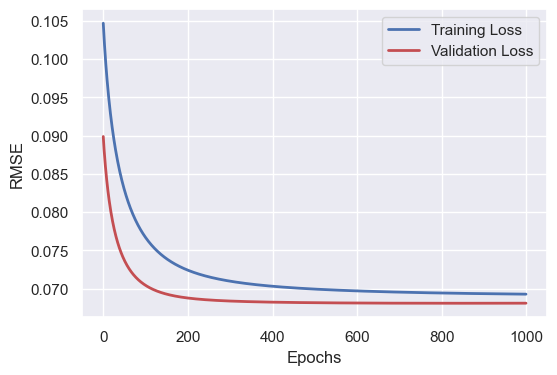

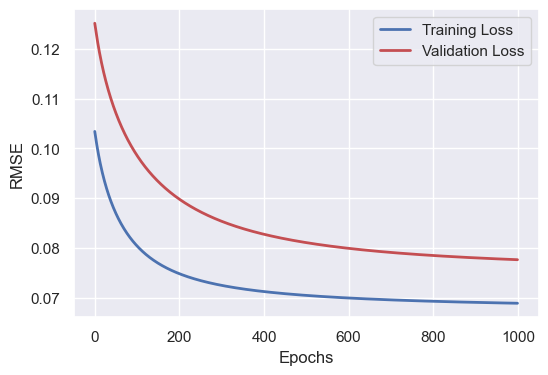

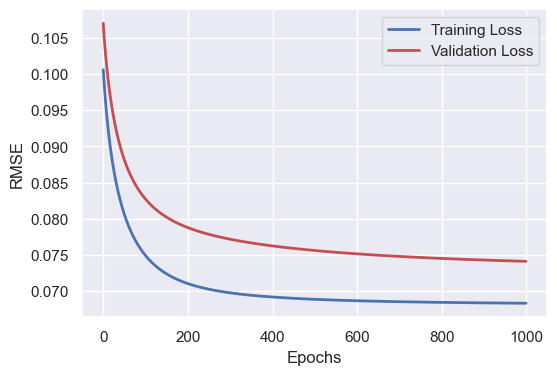

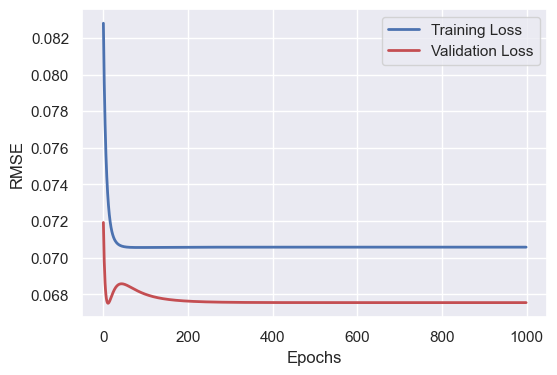

In [57]:
plot_learning_curves(sgd4,x_train,y_train)
plot_learning_curves(sgd5,x_train,y_train)
plot_learning_curves(sgd6,x_train,y_train)
plot_learning_curves(sgd7,x_train,y_train)

Regularization - Ridge

In [58]:
ridge1=Ridge(alpha=0.7)
ridge2=Ridge(alpha=7,solver = 'sparse_cg')
ridge3=Ridge(alpha=10,max_iter = 500,solver = 'cholesky')

cross_val(ridge1,x_train,np.ravel(y_train))
cross_val(ridge2,x_train,np.ravel(y_train))
cross_val(ridge3,x_train,np.ravel(y_train))

Cross Validation - Evaluation using RMSE :  [0.07049471775183816, 0.07346794163354774, 0.07479432887710834, 0.06632018389990324]
Mean:0.07126929304059937 | Std:0.003253981463085946
Cross Validation - Evaluation using RMSE :  [0.08529947966773951, 0.08047985079341732, 0.08774155484405219, 0.07562680297304021]
Mean:0.0822869220695623 | Std:0.004648957274588598
Cross Validation - Evaluation using RMSE :  [0.09124840630331495, 0.08343631774850253, 0.0925732932952643, 0.08198259461936566]
Mean:0.08731015299161185 | Std:0.004652955047695966


Regularization - ElasticNet

Along with alpha, we additionally need to set l1_ratio(default = 0.5)

In [59]:
en1=ElasticNet(alpha=1e-5)
en2=ElasticNet(alpha=0.0001)
en3=ElasticNet(alpha=0.9)

en4=ElasticNet(alpha=0.0001,l1_ratio = 0.39)
en5=ElasticNet(alpha=0.0001,l1_ratio = 0.85)
en6=ElasticNet(alpha=0.0001,max_iter = 1500,l1_ratio = 0.5)

cross_val(en1,x_train,np.ravel(y_train))
cross_val(en2,x_train,np.ravel(y_train))
cross_val(en3,x_train,np.ravel(y_train))
print("--------------------------------------------------")
cross_val(en4,x_train,np.ravel(y_train))
cross_val(en5,x_train,np.ravel(y_train))
cross_val(en6,x_train,np.ravel(y_train))

Cross Validation - Evaluation using RMSE :  [0.06985149384257237, 0.07259172808344548, 0.07392566540763369, 0.06718140762236292]
Mean:0.07088757373900362 | Std:0.0025953454419693385
Cross Validation - Evaluation using RMSE :  [0.0698513147696677, 0.07257643410875109, 0.07379852985693022, 0.06719387813521245]
Mean:0.07085503921764037 | Std:0.0025514163102908095
Cross Validation - Evaluation using RMSE :  [0.23958178829273122, 0.20409569624319301, 0.2151577823718974, 0.25058168380412704]
Mean:0.22735423767798718 | Std:0.018565697665899467
--------------------------------------------------
Cross Validation - Evaluation using RMSE :  [0.06984943080174194, 0.07258636951293003, 0.0738317056656778, 0.06718002909601202]
Mean:0.07086188376909044 | Std:0.002567820477706625
Cross Validation - Evaluation using RMSE :  [0.0698576667575909, 0.07255040326896275, 0.07369409395711735, 0.06723843282557646]
Mean:0.07083514920231186 | Std:0.0025003750842926818
Cross Validation - Evaluation using RMSE :  [

Observations:

1. For Ridge models, as the alpha value increased the mean error increased.
2. For ElasticNet, alpha value is still a dominant hyperparameter, as alpha increases mean value also increases.
3. As the l1_penalty for Elastic Net increases, the rmse error is increased as well.
4. For SGD without penalties, regardless of alpha value we got the same rmse value.
5. For SGD with penalties - penalty l1 or l2 along with changing the values of l1_ratio, we have observed least average scores for penalties being tending towards l1.
   
After the tuning of hyperparameters, we are going with the initial sgd model between tuned sgd and initial one but overall linear regression model has good accuracy.

STEP - 7 :Polynomial Regression

In [60]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(x_train)
X_poly_test = poly_features.transform(x_test)

In [61]:
evaluation_results_poly = {}

In [62]:
def poly_error_and_accuracy_over_test(model):
    y_pred = model.predict(X_poly_test)
    error = np.sqrt(mean_squared_error(y_test,y_pred))
    accuracy = r2_score(y_test,y_pred)
    print("Error(RMSE) : ",error)
    print("Accuracy(R2) : ",accuracy)
    evaluation_results_poly[model] = [round(error,4),round(accuracy,4)]

Model 1 : Multiple Linear Regression Model

In [63]:
poly_model1 = LinearRegression()
poly_model1.fit(X_poly,y_train)

LinearRegression()

In [64]:
poly_error_and_accuracy_over_test(poly_model1)

Error(RMSE) :  0.07942028842438283
Accuracy(R2) :  0.903236511472831


Model 2 : Linear Regression with 4-Fold Cross Validation with SVD

In [65]:
poly_model2 = LinearRegression()
cross_val(poly_model2,X_poly,y_train)
#or using cross_val_scores function
poly_score2 = -cross_val_score(poly_model2, X_poly, np.ravel(y_train), scoring='neg_root_mean_squared_error', cv=kFolds)
print("Evaluation using RMSE (m2): ",poly_score2)

Cross Validation - Evaluation using RMSE :  [0.06392918042743698, 0.06965907788314789, 0.062321102189681996, 0.060234583383662735]
Mean:0.0640359859709824 | Std:0.0035007877003269128
Evaluation using RMSE (m2):  [0.06392918 0.06965908 0.0623211  0.06023458]


In [66]:
poly_error_and_accuracy_over_test(poly_model2)

Error(RMSE) :  0.08202836294857843
Accuracy(R2) :  0.8967769502930001


Model 3 : Linear Regression with 4-Fold Cross Validation with SGD

In [67]:
iterations = 1000
poly_model3 = SGDRegressor(alpha = 1e-6,eta0 = 0.019,random_state=42)
cross_val(poly_model3,X_poly,np.ravel(y_train))
#or using cross_val_scores
poly_score3 = -cross_val_score(poly_model3, X_poly, np.ravel(y_train), scoring='neg_root_mean_squared_error', cv=kFolds)
print("Evaluation using RMSE (m3): ",poly_score3)
print("Mean value : ",np.mean(poly_score3))

Cross Validation - Evaluation using RMSE :  [0.09435035601005416, 0.08426315177515951, 0.10107415914651387, 0.0812069185812251]
Mean:0.09022364637823815 | Std:0.00793082965077732
Evaluation using RMSE (m3):  [0.09435036 0.08426315 0.10107416 0.08120692]
Mean value :  0.09022364637823815


In [68]:
poly_error_and_accuracy_over_test(poly_model3)

Error(RMSE) :  0.09514597495527351
Accuracy(R2) :  0.86112328385972


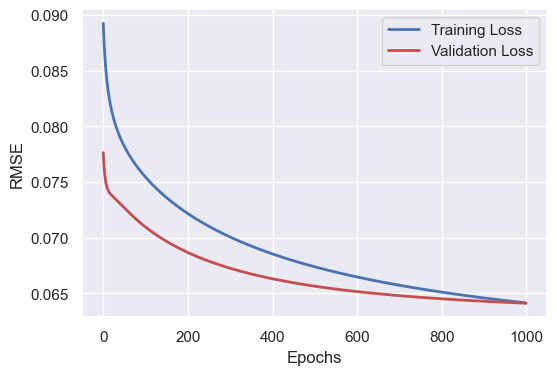

In [69]:
plot_learning_curves(poly_model3,X_poly,np.ravel(y_train))

Model 4 : Linear Regression with Regularization using Lasso

In [70]:
poly_model4 = Lasso(alpha=1.0)
cross_val(poly_model4,X_poly,y_train)
poly_score4 = -cross_val_score(poly_model4, X_poly, np.ravel(y_train), scoring='neg_root_mean_squared_error', cv=kFolds)
print("Evaluation using RMSE (m4): ",poly_score4)

Cross Validation - Evaluation using RMSE :  [0.23958178829273122, 0.20409569624319301, 0.2151577823718974, 0.25058168380412704]
Mean:0.22735423767798718 | Std:0.018565697665899467
Evaluation using RMSE (m4):  [0.23958179 0.2040957  0.21515778 0.25058168]


In [71]:
poly_error_and_accuracy_over_test(poly_model4)

Error(RMSE) :  0.25601680143050853
Accuracy(R2) :  -0.005508004261943089


Model 5 : Linear Regression with Regularization using Ridge

In [72]:
poly_model5 = Ridge(alpha=1.0)
cross_val(poly_model5,X_poly,y_train)
poly_score5 = -cross_val_score(poly_model5, X_poly, np.ravel(y_train), scoring='neg_root_mean_squared_error', cv=kFolds)
print("Evaluation using RMSE (m5): ",poly_score5)

Cross Validation - Evaluation using RMSE :  [0.07156862647466636, 0.07225953560035371, 0.07262203964190966, 0.06712675017613555]
Mean:0.07089423797326633 | Std:0.002207832668537577
Evaluation using RMSE (m5):  [0.07156863 0.07225954 0.07262204 0.06712675]


In [73]:
poly_error_and_accuracy_over_test(poly_model5)

Error(RMSE) :  0.07956700651076423
Accuracy(R2) :  0.9028786667051418


Model 6 : Linear Regression with Regularization using Elastic Net

In [74]:
poly_model6 = ElasticNet(alpha=1.0, l1_ratio=0.5)
cross_val(poly_model6,X_poly,y_train)
poly_score6 = -cross_val_score(poly_model6, X_poly, np.ravel(y_train), scoring='neg_root_mean_squared_error', cv=kFolds)
print("Evaluation using RMSE (m6): ",poly_score6)

Cross Validation - Evaluation using RMSE :  [0.23958178829273122, 0.20409569624319301, 0.2151577823718974, 0.25058168380412704]
Mean:0.22735423767798718 | Std:0.018565697665899467
Evaluation using RMSE (m6):  [0.23958179 0.2040957  0.21515778 0.25058168]


In [75]:
poly_error_and_accuracy_over_test(poly_model6)

Error(RMSE) :  0.25601680143050853
Accuracy(R2) :  -0.005508004261943089


Comparisons

In [76]:
print("----------------Linear Regression----------------")
pd.DataFrame(evaluation_results.items(), columns=['Model', 'Error - Accuracy'])

----------------Linear Regression----------------


,Model,Error - Accuracy
0,LinearRegression(),"[0.0761, 0.9112]"
1,LinearRegression(),"[0.0763, 0.9107]"
2,"SGDRegressor(alpha=0.001, l1_ratio=0.35, rando...","[0.1168, 0.7907]"
3,Lasso(),"[0.256, -0.0055]"
4,Ridge(),"[0.078, 0.9066]"
5,ElasticNet(),"[0.256, -0.0055]"


In [77]:
print("----------------Polynomial Regression----------------")
pd.DataFrame(evaluation_results_poly.items(), columns=['Model', 'Error - Accuracy'])

----------------Polynomial Regression----------------


,Model,Error - Accuracy
0,LinearRegression(),"[0.0794, 0.9032]"
1,LinearRegression(),"[0.082, 0.8968]"
2,"SGDRegressor(alpha=1e-06, eta0=0.019, random_s...","[0.0951, 0.8611]"
3,Lasso(),"[0.256, -0.0055]"
4,Ridge(),"[0.0796, 0.9029]"
5,ElasticNet(),"[0.256, -0.0055]"


Obervations :

1. In Polynomial Regression, we can see that error value has increased and the learning curve of SGDRegressor and SGDRegressor(polynomial) are different as the later one shows a case of overfitting.
2. Lasso and ElasticNet still gave poor R2 scores for Polynomial Regression as well.
3. The Accuracy of the models Linear regression, 4-Fold corss validation with SVD and Ridge decreased in polynomial regression while SGD increased and Lasso, Elasticnet reamined same.

STEP - 8: Tuning HyperParameters - Polynomial Regression

4-Fold Cross Validation with SGD

In [78]:
poly_sgd1 = SGDRegressor(alpha=1e-7, random_state=42,penalty = None)
poly_sgd2 = SGDRegressor(alpha=0.001, random_state=42,penalty = None)

#(trying with penalties)
poly_sgd3 = SGDRegressor(alpha=1e-7, l1_ratio=0.5,eta0=0.01, max_iter=1500, random_state=42)
poly_sgd4 = SGDRegressor(alpha=1e-7,loss="huber", penalty = "l1", random_state=42)
poly_sgd5 = SGDRegressor(alpha=0.01,penalty="l2", random_state=42)
poly_sgd6 = SGDRegressor(alpha=1e-7,l1_ratio=0.9,learning_rate = 'constant', random_state=42)

cross_val(poly_sgd1,X_poly,np.ravel(y_train))
cross_val(poly_sgd2,X_poly,np.ravel(y_train))
print("--------------------------------------------")
cross_val(poly_sgd3,X_poly,np.ravel(y_train))
cross_val(poly_sgd4,X_poly,np.ravel(y_train))
cross_val(poly_sgd5,X_poly,np.ravel(y_train))
cross_val(poly_sgd6,X_poly,np.ravel(y_train))

Cross Validation - Evaluation using RMSE :  [0.10507131873199416, 0.09221947801638883, 0.11004662424068193, 0.08800333287105087]
Mean:0.09883518846502895 | Std:0.009023335486492664
Cross Validation - Evaluation using RMSE :  [0.10507131873199416, 0.09221947801638883, 0.11004662424068193, 0.08800333287105087]
Mean:0.09883518846502895 | Std:0.009023335486492664
--------------------------------------------
Cross Validation - Evaluation using RMSE :  [0.10507131931956855, 0.09221947803419496, 0.11004662469669405, 0.08800333368996807]
Mean:0.0988351889351064 | Std:0.009023335480634193
Cross Validation - Evaluation using RMSE :  [0.1115286643030054, 0.09804342124087143, 0.11730227126153173, 0.09439784227409556]
Mean:0.10531804976987602 | Std:0.009412285185146162
Cross Validation - Evaluation using RMSE :  [0.10513262812285358, 0.09222266731313683, 0.11009338235871532, 0.08809020205179384]
Mean:0.0988847199616249 | Std:0.009021848916934756
Cross Validation - Evaluation using RMSE :  [0.087156

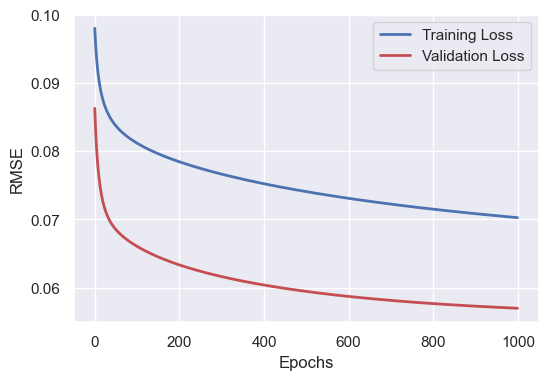

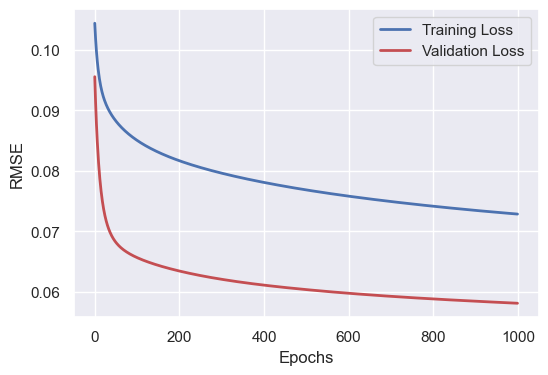

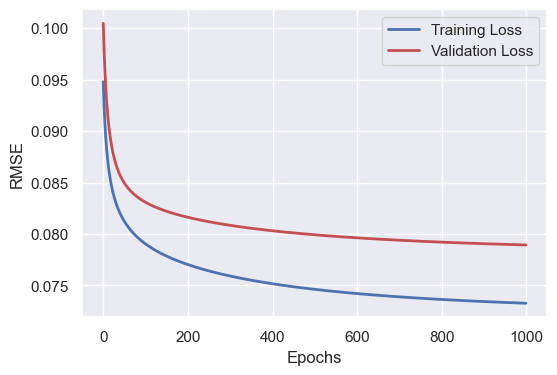

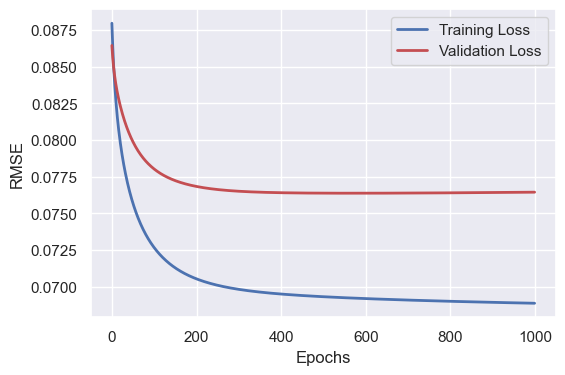

In [79]:
plot_learning_curves(poly_sgd3,X_poly,y_train)
plot_learning_curves(poly_sgd4,X_poly,y_train)
plot_learning_curves(poly_sgd5,X_poly,y_train)
plot_learning_curves(poly_sgd6,X_poly,y_train)

Regularization - Lasso

In [80]:
poly_lasso1=Lasso(alpha=0.9)
poly_lasso2=Lasso(alpha=6)
poly_lasso3=Lasso(alpha=15,max_iter = 500)

cross_val(poly_lasso1,X_poly,np.ravel(y_train))
cross_val(poly_lasso2,X_poly,np.ravel(y_train))
cross_val(poly_lasso3,X_poly,np.ravel(y_train))

Cross Validation - Evaluation using RMSE :  [0.23958178829273122, 0.20409569624319301, 0.2151577823718974, 0.25058168380412704]
Mean:0.22735423767798718 | Std:0.018565697665899467
Cross Validation - Evaluation using RMSE :  [0.23958178829273122, 0.20409569624319301, 0.2151577823718974, 0.25058168380412704]
Mean:0.22735423767798718 | Std:0.018565697665899467
Cross Validation - Evaluation using RMSE :  [0.23958178829273122, 0.20409569624319301, 0.2151577823718974, 0.25058168380412704]
Mean:0.22735423767798718 | Std:0.018565697665899467


Regularization - Ridge

In [81]:
poly_ridge1=Ridge(alpha=0.7)
poly_ridge2=Ridge(alpha=10,solver = 'sparse_cg')
poly_ridge3=Ridge(alpha=17,max_iter = 500,solver = 'cholesky')

cross_val(poly_ridge1,X_poly,np.ravel(y_train))
cross_val(poly_ridge2,X_poly,np.ravel(y_train))
cross_val(poly_ridge3,X_poly,np.ravel(y_train))

Cross Validation - Evaluation using RMSE :  [0.06920073164789292, 0.0715574318769935, 0.07040165446208974, 0.06479071577487193]
Mean:0.06898763344046202 | Std:0.0025623645423591248
Cross Validation - Evaluation using RMSE :  [0.09043719094255846, 0.08053274901263927, 0.09141668334680168, 0.08281290159587945]
Mean:0.08629988122446972 | Std:0.004709507313441301
Cross Validation - Evaluation using RMSE :  [0.0951929381727171, 0.08302283178943624, 0.09626118158845834, 0.08604275353740597]
Mean:0.09012992627200442 | Std:0.00571056376833537


Regularization - ElasticNet

In [82]:
poly_en1=ElasticNet(alpha=1e-5)
poly_en2=ElasticNet(alpha=0.0001)
poly_en3=ElasticNet(alpha=0.9)

poly_en4=ElasticNet(alpha=0.0001,l1_ratio = 0.39)
poly_en5=ElasticNet(alpha=0.0001,l1_ratio = 0.85)
poly_en6=ElasticNet(alpha=0.0001,max_iter = 1500,l1_ratio = 0.5)

cross_val(poly_en1,X_poly,np.ravel(y_train))
cross_val(poly_en2,X_poly,np.ravel(y_train))
cross_val(poly_en3,X_poly,np.ravel(y_train))
print("--------------------------------------------------")
cross_val(poly_en4,X_poly,np.ravel(y_train))
cross_val(poly_en5,X_poly,np.ravel(y_train))
cross_val(poly_en1,X_poly,np.ravel(y_train))

Cross Validation - Evaluation using RMSE :  [0.06491381758593258, 0.07026098889537846, 0.06211899210699852, 0.060033186273097554]
Mean:0.06433174621535177 | Std:0.0038362945715979205
Cross Validation - Evaluation using RMSE :  [0.06160826906727428, 0.06943909630975179, 0.06289810745155815, 0.05876804848258728]
Mean:0.06317838032779287 | Std:0.003911246407705302
Cross Validation - Evaluation using RMSE :  [0.23958178829273122, 0.20409569624319301, 0.2151577823718974, 0.25058168380412704]
Mean:0.22735423767798718 | Std:0.018565697665899467
--------------------------------------------------
Cross Validation - Evaluation using RMSE :  [0.06167127677547633, 0.06944640611861709, 0.06275972289602283, 0.05890287658205324]
Mean:0.06319507059304237 | Std:0.0038734222754896034
Cross Validation - Evaluation using RMSE :  [0.061834869019954344, 0.06979544255102173, 0.06357838734983172, 0.0588484717082861]
Mean:0.06351429265727347 | Std:0.004001477883199639
Cross Validation - Evaluation using RMSE :

Observations :

1. Undefitting cases identified for SGD Regressor.
2. For Ridge Regression, as the alpha value increased, Rmse error increased
3. The same goes for ElasticNet as well. And for a constant alpha value and varying l1_ratio, as l1_ratio increased, the Rmse decreased.

STEP - 9 : Testing and Evaluating the final Model

Question G:

Make predictions of the labels on the test data, using the trained model with chosen hyperparameters. Summarize performance using the appropriate evaluation metric. Discuss the results. Include thoughts about what further can be explored to increase performance.

Linear Regression and Linear Regression with SVD gave a fairly good Rmse value and Accuracy. 
Considering the final model as Linear Regression for a good fit.

In [83]:
#using linear regression
final_model1 = LinearRegression()
final_model1.fit(x_train,y_train)

#Making Predictions on Test Set
y_pred = final_model1.predict(x_test)
score = np.sqrt(mean_squared_error(y_test,y_pred))
print("Error (RMSE) : ",score)
r2Score = r2_score(y_test,y_pred)
print("Accuracy (R2) : ",r2Score)

Error (RMSE) :  0.0760702423610623
Accuracy (R2) :  0.9112275517948973


In [84]:
#using linear regression with 4-fold cross validation with svd
folds = 4
kFolds = KFold(n_splits=folds, shuffle=True, random_state=42)

In [85]:
def cross_val(model,x_train,y_train):
    scores = []
    for train_index, test_index in kFolds.split(x_train):
        train_X, x_val = x_train[train_index], x_train[test_index]
        train_y, y_val = y_train[train_index], y_train[test_index]
        model.fit(train_X,train_y)
        y_pred = model.predict(x_val)
        scores.append(np.sqrt(mean_squared_error(y_val, y_pred)))
    print("Cross Validation - Evaluation using RMSE : ",scores)
    print(f"Mean:{np.array(scores).mean()} | Std:{np.array(scores).std()}")

In [86]:
#1. Closed form solution or SVD 
final_model2 = LinearRegression()
cross_val(final_model2,x_train,y_train)
#or using cross_val_scores function over Validation set
scores2 = -cross_val_score(final_model2, x_train, np.ravel(y_train), scoring='neg_root_mean_squared_error', cv=kFolds)
print("Evaluation using RMSE (m2): ",scores2)

Cross Validation - Evaluation using RMSE :  [0.06985182601824962, 0.07259286763110424, 0.07394001632895988, 0.06718313672680558]
Mean:0.07089196167627983 | Std:0.0025990855567790717
Evaluation using RMSE (m2):  [0.06985183 0.07259287 0.07394002 0.06718314]


In [87]:
#Making Predictions on Test Set
y_pred = final_model2.predict(x_test)
score = np.sqrt(mean_squared_error(y_test,y_pred))
print("Error (RMSE) : ",score)
r2Score = r2_score(y_test,y_pred)
print("Accuracy (R2) : ",r2Score)

Error (RMSE) :  0.07628987021905748
Accuracy (R2) :  0.9107142091921675


In [96]:
#Making Predictions for single values: 
def predict_Chance_of_Admit(model):
    #Choosing a random value from x_test to predict
    rand = random.randint(0, 79)
    dataPoint = x_test[rand]
    actual_result = y_test[rand]
    dataPoint = np.array(dataPoint).reshape(1,-1)
    test_result = model.predict(dataPoint)
    print("Actual : {}, Predicted : {}".format(actual_result,test_result))

predict_Chance_of_Admit(final_model1)
predict_Chance_of_Admit(final_model2)

Actual : [0.46296296], Predicted : [[0.47727926]]
Actual : [0.7037037], Predicted : [[0.72251203]]


Observations :

1. The model makes predictions on test set with an average of 92% accuracy.
2. For the future work, for the model to make more accurate predictions, we could add more data and features which have good correlation with target variable as the dataset is not quite large.
3. Can experiment with other regression models such as decision tree, random forest etc and analyse the accuracy obtained.
4. Investigating the data for data quality issues or adding any other contributing features etc can be done.